# Evolutionary Game Theory

## Learning goals:

After this week, the student will be able to:
- Familiarize with the ingredients necessary to obtain evolution by natural selection
- Use simple models for discrete evolution on the computer
- Implement and examine evolutionary models built on games
- Identify evolutionary stable strategies

## Natural Selection


As first described by Charles Darwin, bilogical evolution can be explained through the concept of natural selection. In short, natural selection describes the mechanism through which different types of genes are transferred across generations in a larger number than other types of genes because individuals carrying advantageous or useful gene variants will, in general, be able to reproduce more often than those carrying less favourable gene variants.

## Evolutionary Biology and Evolution of Social Structure

Before this lecture you **must** have read:
- Chapter 8, “Evolutionary Biology”, p. 117-127 *(Binmore, Ken)*

You are also encouragecd to read:
- Chapter 8, “Evolutionary Biology”, p. 127-139 *(Binmore, Ken)*
- Introduction to Part I: Location, p. 15-16
- Chapter 2, “Bargaining with Neighbours”, p. 17-29

The last two readings refer to *Skyrms, Brian. The  Stag  Hunt  and  the  Evolution  of  Social  Structure.  Cambridge:  Cambridge University Press, 2004.*

## Evolution by Natural Selection

Reading on <a href="https://uio.instructure.com/courses/33071/files/1425717">natural selection</a>

In order to obtain evolution from natural selection, a set of criterions must be met. A common way to define evolution by natural selection is therefore to list a summary (or a recipe, if you like) of the needed ingredients to obtain change. This way of defining the evolutionary process is often referred to as the classical tradition of summary of evolution by natural selection, and typically involves three main ingredients (see Godfrey-Smith, 2009):

1. Variation
2. Heredity 
3. Differences in the reproductive output 

The actual form that these three ingredients take, depends on the scenario in question. For example, a disease will spread by natural selection through a given population if the poulation consists of a mix of people that are infected and people that are not infected (variation), if the disease can be passed on to other individuals (heredity) and if some individuals pass on the disease easier than others (differences in the reproductive output). In the following we will study two simplified scenarios of evolution by natural selection. 

### Mutation of Genes 

A common example of evolution by natural selection is the inheritance of gene mutations over generations of a population. In such cases one typically starts by letting one part of the population possess a given mutation which the rest of the population do not carry. Assume therefore in the following that in a given population of one hundred individuals, there is initially one individual carrying a certain mutation. Denoting the generation of the population with the variable $t$, the number of people carrying the mutated gene with $M$, the number of people carrying the non-mutated, old gene with $O$, and the fraction of the population carrying the mutation with $F$, we insert the properties of the first generation, $t_0$, as follows:

In [ ]:
# Initializing
t_0 = 0               # First generation with mutation
M_0 = 1               # Number of individuals carrying the mutated gene in the first generation
O_0 = 99              # Number of individuals carrying the old variant of the gene in the first generation
F_0 = M_0/(M_0 + O_0) # Fraction of mutated individuals in the population in the first generation

The fraction of mutations in the population in generation $t$ is given by 

\\[
\text{Fraction of mutations in generation}\ t = \frac{\text{Number of mutations in generation} \ t}{\text{Total number of people in generation} \ t}.
\\] 

Since the total number of people in the population of generation $t$ is given by the sum of the number of people carrying the mutated gene and the number of people carrying the old gene, this fraction can also be written as 

\\[
F(t) = \frac{M(t)}{M(t) + O(t)}.
\\]

In the first generation the fraction of individuals carrying the mutated gene is therefore given by $F_0 = M_0/(M_0+O_0) = 1/100$. 

Further assume that the mutated gene multiplies at a rate $k_M$, meaning that each mutated individual reproduces $k_M$ direct descendants in the next generation. Then the number of mutated individuals in the next generation, $M(t+1)$, is equal to the number of direct descendants from each of the $M(t)$ individuals from the previous generation, namely $k_MM(t)$. In other words, the total number of mutated genes in the next generation is

\\[
M(t+1) = k_MM(t).
\\]

Similarily, assuming that the carriers of the old gene reproduce $k_O$ direct descendants, the number of individuals inheriting the old gene in the next generation is 

\\[
O(t+1) = k_OO(t). 
\\]

In the code below we set $k_M = 1.2$, $k_O = k_M/2$ and choose to simulate over $N_{\text{gen}} = 30$ generations. Below we define an array of generations ranging from the zeroth generation to the $N_{\text{gen}}^{\text{th}}$ generation. Because the spreading of the mutation happens over one generation at a time, the spacing between each element in the generation-array must be exactly one. Hence, since `linspace` counts both the start and stop-value in the array, we must let the number of spacings be $N_{\text{gen}} + 1$. 

We also define three arrays of the same number of elements as the generation-array, with all elements set to zero. For this we use the `zeros`-function in the NumPy-package. The reason why we create these three arrays is that we want to keep track of the evolution of the number of people inheriting the mutated gene, the number of people inheriting the old gene, and the fraction of people in the whole population that inherit the mutated gene for each generation.

In [ ]:
k_M    = 1.2         # Rate of multiplication of mutated gene
k_O    = 0.5*k_M     # Rate of multiplication of old gene
N_gen  = 30          # Number of generations

import numpy as np
#Making arrays 
t = np.linspace(0, N_gen, N_gen+1) # Array of generations
M = np.zeros(N_gen+1)              # Array of number of individuals with mutated gene
O = np.zeros(N_gen+1)              # Array of number of individuals with old gene
F = np.zeros(N_gen+1)              # Array of fraction of mutations to the total number of individuals

We then set the first element in each of these three arrays to be equal to the initial values of the number of people carrying the mutation, $M_0$, the old gene, $O_0$, and the fraction of people carrying the mutated gene, $F_0$. This is done by the following assignment

In [ ]:
M[0] = M_0
O[0] = O_0
F[0] = F_0

Using the rules defined above and looping over each generation, we update the numbers $M$, $O$ and $F$ for each generation. This is done in the following for-loop:

In [ ]:
for i in range(N_gen): #Looping over generations
    M[i+1] = k_M*M[i]
    O[i+1] = k_O*O[i]
    F[i+1] = M[i+1]/(M[i+1] + O[i+1])

Eventually, we make a plot of the fraction of individuals carrying the mutation to the total number of people in the population as a function of the generation as follows,

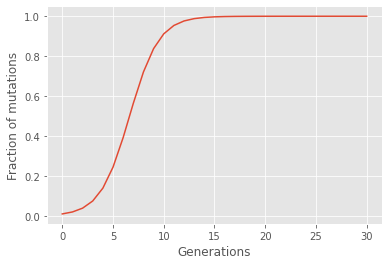

In [ ]:
import matplotlib.pyplot as plt    
plt.style.use("ggplot") # Function that makes the plot look nice. Not necessary for plotting.      
plt.plot(t, F)
plt.xlabel("Generations")
plt.ylabel("Fraction of mutations")
plt.show()

From the figure above we observe that after about 14 generations, the whole population inhabits the mutation instead of the old gene. Additionally, we observe that the fraction of mutations as a function of generation takes the form of an *S*. This shape is characteristic for models following evolution by natural selection. From the plot we observe that the first approximately six generations experience an exponential growth in the number of people ineriting the mutated gene, whereas the following generations rather experience an exponential decrease in this number, until the whole population inherits the mutated gene. 

---

### In-class exercises:

1. What happens to the fraction of mutants in the population if you set the growth rate of the old gene equal to the growth rate of the mutant gene, i.e. if you set $k_O = k_M$ in the code above? 
2. Now set $k_O = 2k_M$. What do you see? 
3. Instead of plotting the fraction of mutated individuals to the total number of people, plot the evolution of the number of people with the mutated gene as a function of generation. Do the same for the number of people with the old gene. Does the result coincide with your expectations? What happens when you change the values of $k_O$ and $k_M$ as in the previous exercises?
---

### Spread of Disease

As another example of a system that can be modelled by evolution through natural selection, we will study the spread of a disease in a given population. Let $P$ be the number of people in the population, and assume that at the start of the infection only one individual is infected. The rest of the population is thus susceptible to the infection. Assume that the population consists of 100 people, and that this number of people stays fixed throughout the simulation. At the beginning of the infection, i.e. at $t_0 = 0$, we may therefore write the total number of people in the population, $P$, as the sum of the number of infected individuals on day zero, $I_0$, and the number of susceptibles on the same day, $S_0$. We thus initialize the system by writing 

In [ ]:
t_0 = 0         # Starting time at day 0
I_0 = 1         # Number of infected on day 0
S_0 = 99        # Number of susceptibles on day 0
P   = I_0 + S_0 # Total number of people 

This one infected individual can – in theory – infect all the 99 others during a given interval of time after the beginning of the infection. If this is the case, then $ 1\cdot 99$ people will be infected during this time interval, and the total number of infected after this interval of time will be $(1 + 1\cdot99) = 100$ people. Similarily, if at a given time $t$ after the start of the infection there are $I(t)$ infected people, and the number of susceptibles is $S(t)$, then these $I(t)$ infected can infect $S(t)$ susceptibles each. There are therefore 

\\[I(t)S(t)\\] 

possible pairs of susceptibles and infected.

In a realistic scenario, however, an infected person will not necessarliy be able to infect a susceptible person. Thus the actual number of possible pairs of susceptibles and infected should be lower than the product $I(t)S(t)$. This effect can be accounted for by multiplying the product of the number of infected and the number of susceptibles with a number that is smaller than one. We call this number $ \gamma $ (pronounced "gamma"), to symbolise that it can be any kind of number larger than zero, but smaller than one. The number of possible pairs of susceptibles and infected will thus be 

\\[
\gamma I(t)S(t).
\\]

Moreover, this number of possible pairs of infected and susceptibles should depend on the length of the time interval over which people have been able to infect each other. The longer the time interval is, the more people have had the chance to meet and hence the number of pairs of people increases. During a time interval $\Delta t$, the number of possible pairs of infected and susceptibles is 

\\[\gamma I(t)S(t)\Delta t.\\]

Because the computer uses the number of susceptibles and infected at the start of a time step to calculate the same quantities at the end of a time step, we will get more information about the spreading of the disease if the time step is smaller. This is due to the fact that the spreading of a disease is a continuous process, happening at every time instant, as opposed to a gene mutation which is confined to be spread thorugh one generation at a time. If the time step is as long as the simulation time, we loose all the information about the spreading between the start and the end of the simulation, and the final result becomes nonsensical. However, the smaller the time step is, the more calculations must be performed to get from the beginning to the end of the simulation. Thus, to make sure that the time interval is sufficiently smaller than the simulation time, one typically defines it to take the value 

\\[\Delta t = \frac{\text{simulation time}}{\text{number of time steps}},\\]

where the number of time steps is at least ten times the size of the simulation time. In the code below we have set the simulation time to ten days, and the number of time steps to be ten times the number of days, i.e. 1000 steps. The time step is therefore $\Delta t = 10/1000 = 0.1$. We have further set the infection rate to $\gamma = 0.02$.  

In [ ]:
gamma = 0.02         # Infection rate

# Time in days
time = 10            # Number of days
N    = int(10*time)  # Number of time steps 
dt   = time/N        # Time step

Consequently, the total number of infected after a time $t + \Delta t$ is the sum of the total number of infected after a time $ t$ and the number of newly infected during a time interval $ \Delta t$. In other words, 

\\[
\text{Number of infected at time }(t + \Delta t) = \text{Number of infected at time }t + \text{Number of infected during }\Delta t,
\\]

which can be written in terms of the already introduced quantities as

\\[
I(t + \Delta t) = I(t) + \gamma I(t)S(t)\Delta t.
\\]

Also, since we assume that the number of people in the population stays constant during the spread of the disease, the number of susceptibles is given as

\\[
S(t) = P - I(t). 
\\]


Below we have defined a time array, $t$, which is needed for plotting later. Additionally, since we want to plot the evolution of the number of infected people as a function of time, we introduce an array $I$ consisting of $N$ elements of value zero. The first element should take the value $I_0$, which is the number of infected people on the zeroth day of infection. All the other elements should be filled with a new number of infected during the simulation. The arrays are given as follows

In [ ]:
import numpy as np
t = np.linspace(t_0, time, N) # Time array
I = np.zeros(N)               # Array of infected people
I[0] = I_0                    # First element in array of infected

Looping over each time element indexed from $0$ to $N-1$ in the arrays of length $N$, we start by finding the number of susceptibles at the given time step. Then we calculate the number of newly infected during this time step, and eventually update the next value in the array $I$ with the sum of the number of infected before the time step and the number of infected during this time step. We write this as  

In [ ]:
for i in range(N-1): # Looping over time steps
    S = P - I[i]
    newly_infected = gamma*I[i]*S
    I[i+1] = I[i] + newly_infected*dt

Finally, having obtained an array governing the evolution of the number of infected people during the chosen number of infection-days, we may plot this array as a function of time. This is done in the code below. We see that the number of infected follow the characteristic *S*-shaped curve of evolution by natural selection, where the spread of disease intitally increases exponentially until approximately halfway into day two, where the number of infected individuals instead starts to decrease exponentially.

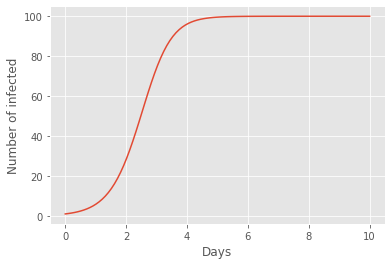

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") # Function that makes the plot look nice. Not necessary for plotting.        
plt.plot(t, I)
plt.xlabel("Days")
plt.ylabel("Number of infected")
plt.show()

---

### In-class exercises:

1. Change the rate of the spread of the infection, $\gamma$, to a value higher than the one given in the code above, and then to a value lower than the one given above. How does changing this number affect the number of infected after five days? 
2. Compute the number of susceptibles as a function of time. Plot this together with the graph of infected people above. What do you see?
3. Play around with different numbers of time steps, both smaller and larger than the one used in the code above. Try for example $N = 100\cdot\text{time}$, $N = \text{time}$, $N = 0.2\cdot\text{time}$ and $N = 1$. What do you observe? For which number of time steps do you get the best result? 
---

## Replicator dynamics on symmetrical 2x2 games

The replicator dynamics are defined in *Binmore* as models describeing the increase of a replicator proportional to:
- the fraction of the population currently hosting the replicator;
- the difference between the current fitness of the replicator's hosts and the average fitness of all the hosts in the population.

The first requirement comes from the fact that small populations have fewer parents to pass on their genes (strategies), so growth is limited. The second requirement comes from the assumption that more fit populations grow, and less fit populations shrink. In game theory, the replicators are the strategies in a game (playing hawk or dove), and the hosts are the players(player 1 and 2). We will only consider symmetrical games, where both players have the same strategies and payoffs.

We have a population playing the game Chicken, given by the game matrix below. A fraction $D$ of the population are playing dove(nice), and a fraction $H$ are playing hawk(not nice). The expected fitness of playing dove is then depentant on the probability of meeting another player who plays dove, and of meeting another player who plays hawk. The probabilities are of course $D$ and $H$, respectively (since if a fraction 0.3 are playing dove, the probability of meeting someone playing dove is 0.3). The expected fitness is also dependant on the payoffs in the game matrix. We can write the expected fitness of playing dove in Chicken as

$$
\begin{aligned}
    f(D) = 2 \cdot D + 0 \cdot H
\end{aligned}
$$

And the expected fitness of playing hawk can be written as

$$
\begin{aligned}
    f(H) = 4 \cdot D - 1 \cdot H
\end{aligned}
$$

The average fitness of the entire population is then given by

$$
\begin{aligned}
    \overline{f} = f(D) \cdot D + f(H) \cdot H
\end{aligned}
$$

![title](assets/ReplicatorGames.PNG)

We now have all the terms used in the definition of the replicator dynamics. The fraction of the population hosting the replicators($D$ and $H$), the current fitness of the replicator's hosts($f(H)$ and $f(H)$) and the average fitness($\overline{f}$).

The fraction of hosts playing each strategy will change according to the replicator dynamics. The new fraction of hosts playing dove after some time $\Delta t$ is given by

$$
\begin{equation}
\begin{aligned}
    D_{New} = D + D \cdot (f(D) - \overline{f}) \cdot \Delta t
\end{aligned}
\end{equation}
$$

A larger time step gives a larger change, but a smaller time step introduces less error. By repeatedly applying this equation to the fraction of hosts playing dove and hawk, we can simulate the evolution of the system given by the game.

### Exercises

**a)** Simulate the population of doves and hawks playing Chicken in python:
- Start off with 2/3 playing dove and 1/3 playing hawk
- Append the fractions to their own empty lists
- Calculate the fitnesses of playing dove and hawk, and the average fitness
- Update the fractions playing dove and hawk with a time step of 0.01
- Append the new fractions to the lists
- Repeat 1000 times

**b)** Plot the change in the fraction playing each strategy

**c)** Do the same simulation and plotting for the prisoners dilemma.

**d)** Do the same simulation and plotting for the stag hunt. What happens if you decrease the fraction playing dove? What happens if you increase it?

## 3x3 Replicator dynamics

The replicator dynamics can be applied to games with more strategies. Rock paper scissors is an exellent game to analyze, since it is relatively easy to set up, and since it exhibits many interesting evolutionary behaviors.

![title](assets/RPS.PNG)

When setting up the replicator dynamics equations, you need the payoffs for each player for each pair of strategies. This can make the equations and code hard to work with for larger games (in the case of a symmetrical 3x3 game there are 9 different payoffs). In the case of rock paper scissors however, there are only three possible payoffs: win, lose or draw. You should save these three payoffs in their own variables before setting up the replicator dynamics equations. This will also let you change the payoffs for winning and losing without rewriting the equations.

### Exercises

**a)** Simulate the population of players playing rock, paper and scissors:
- Start off with 1/2 playing rock and 1/4 playing paper and scissors
- Append the fractions to their own empty lists
- Calculate the fitnesses of playing rock, paper and scissors, and the average fitness. Use variables holding the payoffs for winning, losing and drawing.
- Update the fractions playing rock, paper and scissors with a time step of 0.001
- Append the new fractions to the lists
- Repeat 50000 times

**b)** Plot the change in the fraction playing each strategy

**c)** Increase the time step(just for this exercise). Before you run the simulation: What do you think will happen?

**d)** Change the payoff for winning rock paper scissors to 2. Before you run the simulation: What do you think will happen?

**e)** Change the payoff for losing rock paper scissors to -2 (with winning having a payoff of 1). Before you run the simulation: What do you think will happen?

**f)** Do these simulations say anything about possible mixed strategy nash equilibria of rock paper scissors?